In [1]:
import os
print(os.listdir("../input"))

['births2015']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/births2015/Births2015.csv')
df.head()

,Unnamed: 0,date,births,wday,year,month,day_of_year,day_of_month,day_of_week
0,1,2015-01-01,8068,Thu,2015,1,1,1,5
1,2,2015-01-02,10850,Fri,2015,1,2,2,6
2,3,2015-01-03,8328,Sat,2015,1,3,3,7
3,4,2015-01-04,7065,Sun,2015,1,4,4,1
4,5,2015-01-05,11892,Mon,2015,1,5,5,2


In [4]:
df = df[['date','births']]
df.head()

,date,births
0,2015-01-01,8068
1,2015-01-02,10850
2,2015-01-03,8328
3,2015-01-04,7065
4,2015-01-05,11892


In [5]:
df.set_index('date',inplace=True)

In [6]:
df.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [7]:
df.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


<AxesSubplot:xlabel='date'>

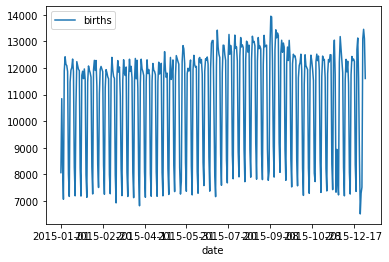

In [8]:
df.plot()

<AxesSubplot:xlabel='date'>

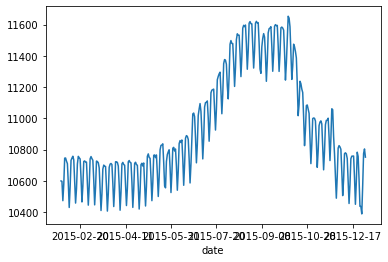

In [9]:
df.births.rolling(window=30).mean().plot()

In [10]:
# Naive methodology considering predicted vales as preceeding value to check the error in birthe rate, since we can observe a pattern in moving average plot

In [11]:
val = pd.Series(df.births)

In [12]:
df1 = pd.concat([val,val.shift(1)],axis=1)
df1.head()

,births,births
date,,
2015-01-01,8068,NaN
2015-01-02,10850,8068.0
2015-01-03,8328,10850.0
2015-01-04,7065,8328.0
2015-01-05,11892,7065.0


In [13]:
df1.columns = ['Actual_births','Predicted_births' ]
df1.head()

,Actual_births,Predicted_births
date,,
2015-01-01,8068,NaN
2015-01-02,10850,8068.0
2015-01-03,8328,10850.0
2015-01-04,7065,8328.0
2015-01-05,11892,7065.0


In [14]:
df2 = df1[1:]

In [15]:
# Checking for residual error from this method
mse = mean_squared_error(df2.Actual_births,df2.Predicted_births)
mse

5162403.576923077

In [16]:
error=np.sqrt(mse)
error

2272.092334594498

Std dvn is 2076.683881 which is closer to the 2272 where error component is very less

In [17]:
# Arima method

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

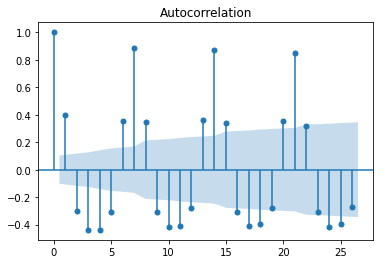

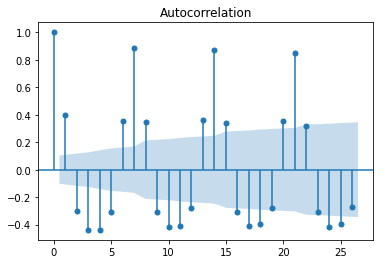

In [19]:
plot_acf(df)

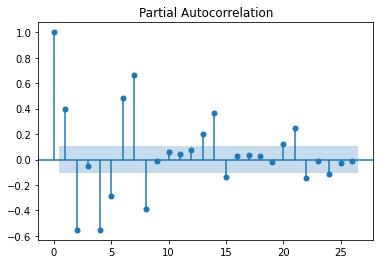

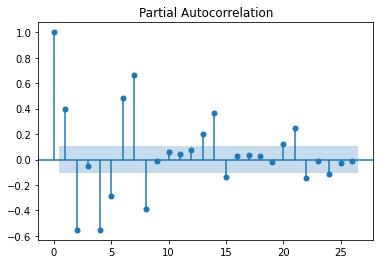

In [20]:
plot_pacf(df)

In [21]:
df_train = df[:250]
df_test = df[250:]

In [22]:
# p = 2,3, d=0, 
arima_model = ARIMA(df_train, order=(2,0,1))

In [23]:
arima_model_fit = arima_model.fit()

In [24]:
arima_model_fit.aic

4373.029628308562

In [25]:
forecast  = arima_model_fit.forecast(steps = 115)[0]

In [26]:
forecast

array([11145.67729886, 13015.89649846, 12732.79989453, 11182.98880807,
        9899.34190852,  9736.33762767, 10459.4538117 , 11260.33791743,
       11528.91192897, 11236.82626347, 10774.58192805, 10533.834863  ,
       10620.68852567, 10868.24652076, 11044.79583422, 11043.67148096,
       10921.77264286, 10806.33927245, 10779.72503816, 10833.35483343,
       10902.69294322, 10932.08786182, 10912.65554507, 10874.01391624,
       10850.47701071, 10854.48551944, 10874.41493664, 10890.66976177,
       10892.52572824, 10883.17047479, 10872.98217691, 10869.67250797,
       10873.49016937, 10879.3945175 , 10882.41023694, 10881.24421592,
       10878.06877816, 10875.83972227, 10875.88803349, 10877.4596111 ,
       10878.92469014, 10879.24575215, 10878.54913938, 10877.66534853,
       10877.29960333, 10877.55579815, 10878.05033084, 10878.34642054,
       10878.29022597, 10878.034019  , 10877.82824234, 10877.80742426,
       10877.92840862, 10878.05798722, 10878.09871158, 10878.04885185,
      

In [27]:
df_test.head()

,births
date,
2015-09-08,12823
2015-09-09,13949
2015-09-10,13925
2015-09-11,12295
2015-09-12,9062


In [28]:
np.sqrt(mean_squared_error(df_test.births,forecast))

2089.470032186128

We have got much lower error in ARIMA method than the naive methodology 2202 instead of 2089